PARTE UNO PARA PROCESAR DATOS EXTRAIDOS

In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_departamento=pd.DataFrame()
df_personas=pd.DataFrame()

In [ ]:
def asignar_info(Archivo,df_departamento,df_personas):
  Path_Archivo='/content/drive/My Drive/TECH - Data project/Poblacion-Departamento/'+Archivo
  Archivo_temp=pd.read_csv(Path_Archivo)

  if Archivo.split("_")[-1]=='poblacion.csv':
    df2={'Departamento':Archivo_temp.loc[0].at["ubicacion"],
     'Total_población':Archivo_temp.loc[0].at["valor"]}

    df_departamento=df_departamento._append(df2,ignore_index=True)
  elif Archivo.split("_")[-1]=='som.csv':
    df2 = Archivo_temp[['departamento','EDAD','MUJERES_2018']].copy()
    df2=df2.loc[2:8]
    df_personas=df_personas._append(df2,ignore_index=True)
  else:
    print("Archivo mal nombrado:",Archivo)

  return df_departamento,df_personas

In [ ]:
import os

# Replace with your folder path
folder_path = '/content/drive/My Drive/TECH - Data project/Poblacion-Departamento'

# List all files in the folder
files = os.listdir(folder_path)

# Print the list of files
for file_name in files:
    df_departamento,df_personas=asignar_info(file_name,df_departamento,df_personas)


In [ ]:
df_departamento

,Departamento,Total_población
0,Antioquia,5974788
1,Atlántico,2342265
2,Bogotá,7181469
3,Bolívar,1909460
4,Boyacá,1135698
5,Caldas,923472
6,Caquetá,359602
7,Cauca,1243503
8,Cesar,1098577
9,Córdoba,1555596


In [ ]:
df_departamento.rename(columns={'Departamento': 'departamento'}, inplace=True)

In [ ]:
df_personas

,departamento,EDAD,MUJERES_2018
0,Antioquia,10-14,3.69
1,Antioquia,15-19,4.08
2,Antioquia,20-24,4.50
3,Antioquia,25-29,4.40
4,Antioquia,30-34,4.00
...,...,...,...
226,Vichada,20-24,4.14
227,Vichada,25-29,3.59
228,Vichada,30-34,3.04
229,Vichada,35-39,2.69


In [ ]:
df_personas['Porcentaje']=df_personas['MUJERES_2018']/100

In [ ]:
df_resumen = df_personas.groupby('departamento')['Porcentaje'].sum().reset_index()

In [ ]:
df_resumen

,departamento,Porcentaje
0,Amazonas,0.2848
1,Antioquia,0.2780
2,Arauca,0.2914
3,Atlántico,0.2785
4,Bogotá. D. C.,0.2868
5,Bolívar,0.2756
6,Boyacá,0.2614
7,Caldas,0.2572
8,Caquetá,0.2869
9,Casanare,0.2971


In [ ]:
df_resumen=pd.merge(df_resumen,df_departamento,on='departamento')

In [ ]:
df_resumen['personas_menst'] = df_resumen['Porcentaje'] * df_resumen['Total_población']

In [ ]:
df_resumen.to_excel('Personas_menstuantes.xlsx')

In [ ]:
df_personas.to_csv('df_personas.csv')
df_departamento.to_csv('df_departamento.csv')

PARTE DOS PARA TRANSFORMAR INFORMACION DE ACUERDO A LO NECESITADO

In [3]:
import pandas as pd
import numpy as np

In [4]:
Departamento=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vRsoXX7i1coWpclJC-ooxs2LdsDwNI3Uof-ri22ECREPg2yNcmPuJoP88qmJEvOKw/pub?output=xlsx',sheet_name="Sheet1")


Toallas=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vR13GZFZgFsn4ukEBMyEg4gCV17DpXT2PBZ335cuiV3irbLPd3T0UVnCHu7qMlUhrVS0nnAQqPsDfdZ/pub?output=xlsx',
                           sheet_name="Toallas")

Tampones=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vR13GZFZgFsn4ukEBMyEg4gCV17DpXT2PBZ335cuiV3irbLPd3T0UVnCHu7qMlUhrVS0nnAQqPsDfdZ/pub?output=xlsx',
                           sheet_name="Tampones")

Copas=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vR13GZFZgFsn4ukEBMyEg4gCV17DpXT2PBZ335cuiV3irbLPd3T0UVnCHu7qMlUhrVS0nnAQqPsDfdZ/pub?output=xlsx',
                           sheet_name="COPAS")

Info_comp=pd.read_excel('https://docs.google.com/spreadsheets/d/e/2PACX-1vR13GZFZgFsn4ukEBMyEg4gCV17DpXT2PBZ335cuiV3irbLPd3T0UVnCHu7qMlUhrVS0nnAQqPsDfdZ/pub?output=xlsx',
                           sheet_name="Info complementaria")

In [5]:
toallas_anual=240
tampones_anual=360
copas_anual=1

In [6]:
Toallas['Promedio'] = Toallas[['Nosotras', 'Kotex', 'Fresh&Free']].mean(axis=1)
Tampones['Promedio'] = Tampones[['Kotex digital super', 'O.B. Original Medio', 'Nosotras Super']].mean(axis=1)
Copas['Promedio'] = Copas[['UVA', 'LifeCup', 'Nosotras ']].mean(axis=1)

In [7]:
prop_toalla=float(Info_comp.iloc[0,1])
prop_tampon=float(Info_comp.iloc[1,1])
prop_copa=float(Info_comp.iloc[2,1])

precio_toalla=float(Toallas.iloc[0,5])
precio_tampon=float(Tampones.iloc[0,5])
precio_copa=float(Copas.iloc[0,5])

In [14]:
Dep_procesado=Departamento[['departamento','personas_menst']]
Dep_procesado['Toallas'] = Dep_procesado['personas_menst'].apply(lambda x: x *prop_toalla)
Dep_procesado['Tampones'] = Dep_procesado['personas_menst'].apply(lambda x: x *prop_tampon)
Dep_procesado['Copas'] = Dep_procesado['personas_menst'].apply(lambda x: x *prop_copa)

<ipython-input-14-188f3c499bd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dep_procesado['Toallas'] = Dep_procesado['personas_menst'].apply(lambda x: x *prop_toalla)


In [37]:
persona_toalla=toallas_anual*precio_toalla
persona_tampones=tampones_anual*precio_tampon
persona_copa=copas_anual*precio_copa

In [38]:
personas_nal_toallas=round(Dep_procesado['Toallas'].sum())
personas_nal_tampones=round(Dep_procesado['Tampones'].sum())
personas_nal_copas=round(Dep_procesado['Copas'].sum())

nacional_toalla=persona_toalla*personas_nal_toallas
nacional_tampones=persona_tampones*personas_nal_tampones
nacional_copa=persona_copa*personas_nal_copas

In [17]:
Dep_procesado['Gasto toallas'] = (Dep_procesado['Toallas'] *persona_toalla)
Dep_procesado['Gasto tampones'] =(Dep_procesado['Tampones']*persona_tampones)
Dep_procesado['Gasto copas'] =(Dep_procesado['Copas']*persona_copa)

In [18]:
Dep_procesado

,departamento,personas_menst,Toallas,Tampones,Copas,Gasto toallas,Gasto tampones,Gasto copas
0,Amazonas,1.881275e+04,1.751467e+04,2107.027866,526.756966,1.515320e+09,5.809666e+10,4.034491e+07
1,Antioquia,1.660991e+06,1.546383e+06,186030.999168,46507.749792,1.337887e+11,5.129396e+12,3.562081e+09
2,Arauca,6.979117e+04,6.497558e+04,7816.611510,1954.152878,5.621506e+09,2.155259e+11,1.496708e+08
3,Atlantico,6.523208e+05,6.073107e+05,73059.929880,18264.982470,5.254282e+10,2.014467e+12,1.398935e+09
4,Bolivar,5.262472e+05,4.899361e+05,58939.683712,14734.920928,4.238790e+10,1.625132e+12,1.128564e+09
5,Boyaca,2.968715e+05,2.763873e+05,33249.603206,8312.400802,2.391226e+10,9.167848e+11,6.366561e+08
6,Caldas,2.375170e+05,2.211283e+05,26601.903821,6650.475955,1.913140e+10,7.334891e+11,5.093674e+08
7,Caqueta,1.031698e+05,9.605110e+04,11555.019146,2888.754786,8.310072e+09,3.186043e+11,2.212530e+08
8,Casanare,1.128659e+05,1.050782e+05,12640.982278,3160.245570,9.091069e+09,3.485473e+11,2.420467e+08
9,Cauca,3.500461e+05,3.258929e+05,39205.162584,9801.290646,2.819534e+10,1.080996e+12,7.506918e+08


In [39]:
datos_resumidos = {
    'Producto': ['Toallas', 'Tampones', 'Copas'],
    'Consumo personal': [persona_toalla, persona_tampones, persona_copa],
    'Consumo nacional': [nacional_toalla, nacional_tampones, nacional_copa]
}

DatosResumidos= pd.DataFrame(datos_resumidos)

In [40]:
  Dep_procesado.to_excel('Dep_procesado.xlsx')
  DatosResumidos.to_excel('DatosResumidos.xlsx')

In [29]:
# Sample data
number = 1234567.89

# Format the number as currency (USD)
formatted_number = "${:,.2f} Millones".format(number)
formatted_number

'$1,234,567.89 Millones'

In [33]:
"${:,.0f} Millones".format(round(nacional_toalla/1000000))

'$787,594 Millones'

In [36]:
nacional_tampones

356446474691.8656

In [42]:
import matplotlib.pyplot as plt

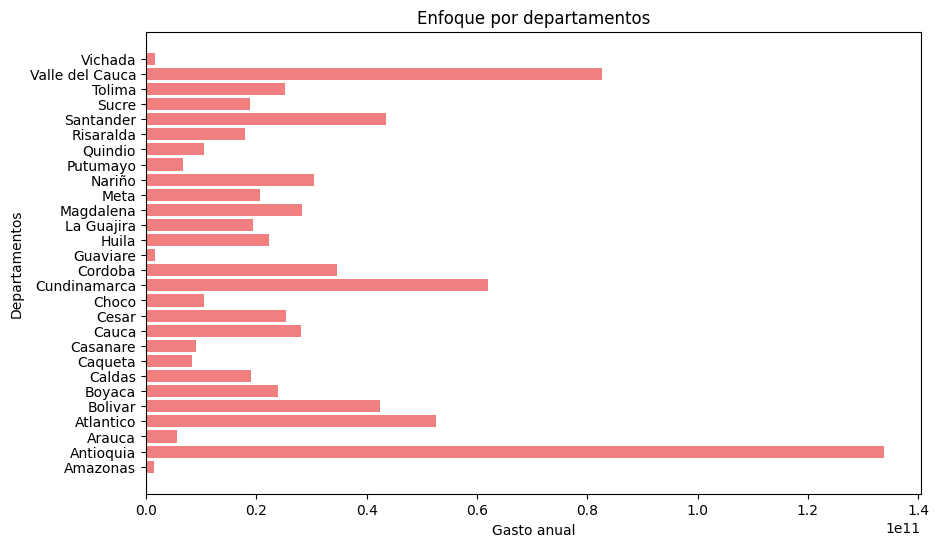

In [45]:

# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(Dep_procesado['departamento'], Dep_procesado['Gasto toallas'], color='lightcoral')
plt.xlabel('Gasto anual')
plt.ylabel('Departamentos')
plt.title('Enfoque por departamentos')
plt.show()

In [ ]:
# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(Dep_procesado['departamento'], Dep_procesado['Gasto toallas'], color='skyblue')
plt.xlabel('Gasto anual')
plt.ylabel('Departamentos')
plt.title('Enfoque por departamentos')
plt.show()